# Demonstration of Pypi package OCaml for polyglot notebook

TL;DR: [this Pypi `ocaml` package](https://pypi.org/project/ocaml/) allows to embed a real and complete OCaml runtime (with full standard library) in an IPython console or Jupyter notebook running IPython kernel (Python 3). OCaml functions and tiny programs can then be called directly from the IPython/Jupyter console, and results can be printed, or affected to Python variables! It even supports [Currying](https://en.wikipedia.org/wiki/Currying) multi-argument functions!

See also: note, if you really want to use OCaml in a Jupyter notebook, the best solution is [OCaml-jupyter](https://github.com/akabe/ocaml-jupyter/) kernel!
(i opened [an issue](https://github.com/akabe/ocaml-jupyter/issues/167) there to present this to the developer, just for his curiosity)

- Author: [Lilian Besson (@Naereen)](https://github.com/Naereen/)
- Date: 23/02/2021
- License: [MIT License](https://lbesson.mit-license.org/)

## Introduction

> See [this issue](https://github.com/Naereen/notebooks/issues/28) I opened and assigned to myself.

If you run this:

In [12]:
!pip3 install ocaml

Then you can use basic OCaml expressions and standard library... from IPython or Jupyter notebook with IPython kernel, without having to install OCaml yourself on your laptop!
It's pre-compiled. I don't know what version thought...

In [176]:
import ocaml

In [177]:
answer_to_life = %ocaml 40 + 2

In [178]:
print(answer_to_life)
print(type(answer_to_life))  # a real integer!

42
<class 'int'>


It would be a great project to show to students studying Python and C and OCaml : this tiny IPython magic makes the link between Python and OCaml (one way) using OCaml compiled as a dynamic extension to CPython 😍 !

## Reference and missing documentation of `ocaml` Pypi package

This [Jupyter notebook](https://jupyter.org) uses the [ocaml v0.0.11](https://pypi.org/project/ocaml/) package from Pypi.

There is no documentation, I asked the [author](https://github.com/LaurentMazare/), who works at [JaneStreet](https://www.janestreet.com/) and he redirected me to [this blog post](https://blog.janestreet.com/using-python-and-ocaml-in-the-same-jupyter-notebook/) by JaneStreet.

Apparently, being professional developers doesn't mean they restrain themselves from shipping unfinished and undocumented packages to Pypi. Okay... Why? It seems highly unprofessional! I understand being in a hurry, but then just don't publish to Pypi, and let user install it using `pip` but from a Git repository:
```bash
$ pip install git+https://github.com/<Username>/<Projects>
```

[Their blog post](https://blog.janestreet.com/using-python-and-ocaml-in-the-same-jupyter-notebook/) states
> *Note that this package is not currently very well polished but it should give some ideas of what can be done through this Python-OCaml integration.*

But come on, writing a short README or description in the `setup.py` is the least that they should do...

Iframe showing the <https://pypi.org/project/ocaml/> page:
<iframe src="http://pypi.org/project/ocaml/>

I don't do that!  See my [Pypi packages](https://pypi.org/user/Naereen/) on <https://pypi.org/user/Naereen/>:

> - [lempel-ziv-complexity](https://pypi.org/project/lempel-ziv-complexity) (Last released on Dec 19, 2019): *Fast implementation of the Lempel-Ziv complexity function*.
> - [SMPyBandits](https://pypi.org/project/SMPyBandits) (Last released on Oct 25, 2019): *SMPyBandits: Open-Source Python package for Single- and Multi-Players multi-armed Bandits algorithms.*
> - [parcoursup](https://pypi.org/project/parcoursup) (Last released on Nov 14, 2018): *ParcourSup.py : un clone en Python 3 de ParcoursSup, écrit à but didactique*.
> - [generatewordcloud](https://pypi.org/project/generatewordcloud) (Last released on Oct 16, 2016): *A simple Python (2 or 3) script to generate a PNG word-cloud image from a bunch of text files. Based on word_cloud.*
> - [ansicolortags](https://pypi.org/project/ansicolortags) (Last released on Jul 2, 2016): *ansicolortags brings a simple and powerful way to use colours in a terminal application with Python 2 and 3.*

Let's show the current version of the package, just for reference:

In [1]:
%load_ext watermark

In [6]:
%watermark -v -p ocaml

CPython 3.6.9
IPython 7.16.1

ocaml 0.0.11


## A first example

As for other languages binding, we can have either a full cell, starting with `%%ocaml` :

In [23]:
%%ocaml
print_endline "Hello world from OCaml running in Jupyter (from IPython)!";;

Hello world from OCaml running in Jupyter (from IPython)!


Natively, IPython/Jupyter supports [lots of "magic commands"](https://ipython.readthedocs.io/en/stable/interactive/magics.html), and especially `%%bash`, `%%perl`, `%%javascript` and `%%ruby` interface to famous scripting languages, and a generic `%%script` one.

In [179]:
%%bash
echo "Hello world from Bash running in Jupyter (from IPython)"

Hello world from Bash running in Jupyter (from IPython)


In [180]:
%%script bash
echo "Hello world from Bash running in Jupyter (from IPython)"

Hello world from Bash running in Jupyter (from IPython)


Not that it has been possible, since a long time, to call an OCaml toplevel like this!

In [35]:
%%script ocaml
print_endline "Hello world from OCaml running in Jupyter (from IPython)!";;

        OCaml version 4.05.0

Findlib has been successfully loaded. Additional directives:
  #require "package";;      to load a package
  #list;;                   to list the available packages
  #camlp4o;;                to load camlp4 (standard syntax)
  #camlp4r;;                to load camlp4 (revised syntax)
  #predicates "p,q,...";;   to set these predicates
  Topfind.reset();;         to force that packages will be reloaded
  #thread;;                 to enable threads

# Hello world from OCaml running in Jupyter (from IPython)!
- : unit = ()
# 


But it does nothing else than opening a sub-process, running `ocaml` command, feeding it the content of the cell, and then exiting.

- Cons: It's not so pretty, as it prints all this startup messages. I thought we could silent them, like `python -q` (quiet) option... but we can't!
- Pros: it shows the value of each line, so it can be used to quickly check something, if needed...

## More full `%%ocaml` cells

In [53]:
%%ocaml
let sum : (int list -> int) = List.fold_left (+) 0 in
let a_list (n:int) : int list = Array.to_list (Array.init n (fun i -> i*i+30)) in
for n = 300000 to 300010 do
    Format.printf "\nList of size %2.i had sum = %4.i.%!" n (sum (a_list n));
done;;


List of size 300000 had sum = 8999955009050000.
List of size 300001 had sum = 9000045009050030.
List of size 300002 had sum = 9000135009650061.
List of size 300003 had sum = 9000225010850095.
List of size 300004 had sum = 9000315012650134.
List of size 300005 had sum = 9000405015050180.
List of size 300006 had sum = 9000495018050235.
List of size 300007 had sum = 9000585021650301.
List of size 300008 had sum = 9000675025850380.
List of size 300009 had sum = 9000765030650474.
List of size 300010 had sum = 9000855036050585.

As I was saying, using `%%script ocaml` allows to quickly check things, like for instance the interface of a module!

In [38]:
%%script ocaml
#show Array;;

        OCaml version 4.05.0

Findlib has been successfully loaded. Additional directives:
  #require "package";;      to load a package
  #list;;                   to list the available packages
  #camlp4o;;                to load camlp4 (standard syntax)
  #camlp4r;;                to load camlp4 (revised syntax)
  #predicates "p,q,...";;   to set these predicates
  Topfind.reset();;         to force that packages will be reloaded
  #thread;;                 to enable threads

# module Array :
  sig
    external length : 'a array -> int = "%array_length"
    external get : 'a array -> int -> 'a = "%array_safe_get"
    external set : 'a array -> int -> 'a -> unit = "%array_safe_set"
    external make : int -> 'a -> 'a array = "caml_make_vect"
    external create : int -> 'a -> 'a array = "caml_make_vect"
    external create_float : int -> float array = "caml_make_float_vect"
    val make_float : int -> float array
    val init : int -> (int -> 'a) -> 'a array
    val make_matrix : int

## Using OCaml returned values from Python

This package allows to use dynamically defined OCaml functions *from* Python, the same way it can be done for other languages lke Julia or R (see [this blog post](https://blog.jupyter.org/i-python-you-r-we-julia-baf064ca1fb6) if you never saw these possibilities, or [this one](https://matthiasbussonnier.com/posts/23-Cross-Language-Integration.html)).

For instance:

In [192]:
b = %ocaml true
print(type(b), b)

s = %ocaml "OK ?"
print(type(s), s)

i = %ocaml 2021
print(type(i), i)

f = %ocaml 2.99792458
print(type(f), f)

<class 'bool'> True
<class 'str'> OK ?
<class 'int'> 2021
<class 'float'> 2.99792458


So booleans, strings, integers and floats get perfectly mapped from OCaml values to Python native values.

In [182]:
l = %ocaml [1, 3, 5]
print(type(l), l)

a = %ocaml [|2; 4; 6|]
print(type(a), a)

t = %ocaml (23, 02, 2021)
print(type(t), t)

<class 'list'> [(1, 3, 5)]
<class 'list'> [2, 4, 6]
<class 'tuple'> (23, 2, 2021)


So `'a list`, `'a array` and `'a * 'b * ..` heterogeneous tuples get perfectly mapped from OCaml values to Python native values!

But it's not perfect, as for instance OCaml has a `char` type (similar to the one in C) but Python only has strings, so this'll fail:

`ValueError: ocaml error (Failure"unknown type char")`

In [183]:
c = %ocaml 'C'
print(type(c), c)

ValueError: ocaml error (Failure"unknown type char")

And for functions:

In [185]:
sum_ocaml_1 = %ocaml let sum : (int list -> int) = List.fold_left (+) 0 in sum

In [188]:
print(sum_ocaml_1, type(sum_ocaml_1))

<built-in method anonymous_closure of PyCapsule object at 0x7ff259159120> <class 'builtin_function_or_method'>


In [189]:
sum_ocaml_1 ([1, 2, 3, 4, 5])  # 15

15

Or simply

In [62]:
sum_ocaml_2 = %ocaml List.fold_left (+) 0

In [63]:
sum_ocaml_2 ([1, 2, 3, 4, 5])  # 15

15

What about user defined types?

In [190]:
%%ocaml
type state = TODO | DONE | Unknown of string;;

let print_state (s:state) =
    match s with
    | TODO -> Format.printf "TODO%!"
    | DONE -> Format.printf "DONE%!"
    | Unknown status -> Format.printf "%s%!" status
;;

print_state TODO;;

TODO

It fails:
```
SyntaxError: ocaml evaluation error on lines 1:11 to 1:15
Error: 
>  1: let out = (type TODO | DONE);;
Syntax error: operator expected.
```

In [191]:
t = %ocaml type TODO | DONE

SyntaxError: ocaml evaluation error on lines 1:11 to 1:15
Error: 
>  1: let out = (type TODO | DONE);;
Syntax error: operator expected.
 (<string>)

Indeed the `%ocam` magic only works for *expression*, with no `;;`.

## More datatypes conversions to Python?

We can still explore:
- references, `let x = ref 1`
- polymorphic functions like `let smaller (x: 'a) (y: 'a) : true = x < y` 
- `'a option` type
- functions with labels
- records
- polymorphic variants ?

Fore reference, see <https://github.com/janestreet/ppx_python#conversions>

### References - fail

In [198]:
xref = %ocaml ref 1

ValueError: ocaml error (Failure"unknown type ref")

### Polymorphic function - works!

In [222]:
cons = %ocaml fun hd tl -> hd :: tl
print(cons, type(cons))

<built-in method anonymous_closure of PyCapsule object at 0x7ff259179f30> <class 'builtin_function_or_method'>


In [217]:
cons(10)([20, 30])

[10, 20, 30]

In [221]:
cons(1.0)([2.0, 30])

[1.0, 2.0, 30]

Woooo, somehow OCaml accepted a polymorphic list at some point?

In [208]:
head, tail = %ocaml List.hd, List.tl

In [211]:
a_list = [1, 2, 3]
a_list.append(a_list)
head(a_list), tail(a_list)

(1, [2, 3, [1, 2, 3, [...]]])

Another example:

In [201]:
smaller = %ocaml fun (x: int) (y: int) -> x < y
print(smaller)
help(smaller)

<built-in method anonymous_closure of PyCapsule object at 0x7ff25cf80a20>
Help on built-in function anonymous_closure:

anonymous_closure(...) method of builtins.PyCapsule instance
    int -> int -> bool



In [202]:
smaller_poly = %ocaml fun (x: 'a) (y: 'a) -> x < y
print(smaller_poly)
help(smaller_poly)

<built-in method anonymous_closure of PyCapsule object at 0x7ff259179ea0>
Help on built-in function anonymous_closure:

anonymous_closure(...) method of builtins.PyCapsule instance
    pyobject -> pyobject -> bool



### Option type

In [204]:
none = %ocaml None
print(none, type(none))

None <class 'NoneType'>


In [205]:
some_int = %ocaml Some 42
print(some_int, type(some_int))

42 <class 'int'>


In [206]:
# instinguishable from None, so that's weird!
some_None = %ocaml Some None
print(some_None, type(some_None))

None <class 'NoneType'>


Note that this limitation was explained:

> *Note that this makes the two OCaml values `[Some None]` and `[None]` indistinguishable on the Python side as both are represented using `None`.*

### Functions with labels - labels get erased

In [227]:
# val fold_left : f:('a -> 'b -> 'a) -> init:'a -> 'b list -> 'a
fold_left = %ocaml ListLabels.fold_left

print(fold_left, type(fold_left))
help(fold_left:)

<built-in method anonymous_closure of PyCapsule object at 0x7ff259179f00> <class 'builtin_function_or_method'>
Help on built-in function anonymous_closure:

anonymous_closure(...) method of builtins.PyCapsule instance
    pyobject -> pyobject -> pyobject -> pyobject -> (pyobject) list -> pyobject



In [230]:
fold_left(lambda x: lambda y: x + y)(0)([1, 2, 3, 4, 5])

15

### Record - fail

In [194]:
%%ocaml
type ratio = {num: int; denom: int};;
let add_ratio r1 r2 =
   {num = r1.num * r2.denom + r2.num * r1.denom;
    denom = r1.denom * r2.denom};;
add_ratio {num=1; denom=3} {num=2; denom=5};;

In [197]:
%ocaml {num=1; denom=3}

ValueError: ocaml error (Failure"unknown type ratio")

Of course it fails!

But it could be translated to Python dictionaries.

### Exceptions - fail

In [207]:
exc = %ocaml exception Empty_list

SyntaxError: ocaml evaluation error on lines 1:11 to 1:20
Error: 
>  1: let out = (exception Empty_list);;
Syntax error: operator expected.
 (<string>)

### Polymorphic variants - fail
See [documentation](http://caml.inria.fr/pub/docs/manual-ocaml/expr.html#sss:expr-polyvars)

In [232]:
%%ocaml
Format.printf "%i%!" (let value `float = 0 in value `float);;

0

In [236]:
zero = %ocaml let value `float = 0 in value `float

print(zero, type(zero))

0 <class 'int'>


In [237]:
variant = %ocaml `float

print(variant, type(variant))

SyntaxError: unsupported type Tvariant (<string>)

### Optional arguments - fail

It would be difficult to implement them correctly along side the (awesome) partial application closure feature...

In [240]:
%%ocaml
let bump ?(step = 1) x = x + step;;
Format.printf "\n%i%!" (bump 41);;
Format.printf "\n%i%!" (bump ~step:12 30);;


42
42

In [241]:
bump = %ocaml let bump ?(step = 1) x = x + step in bump

SyntaxError: optional arguments are not supported (<string>)

### Recursive list?

In [7]:
%%ocaml
let rec list1 = 0 :: list2
and list2 = 1 :: list1
in
Format.printf "%i -> %i -> %i -> %i ...%!" (List.hd list1) (List.hd list2) (List.hd (List.tl list2)) (List.hd (List.tl list1));;

0 -> 1 -> 0 -> 1 ...

In [6]:
# don't run
if False:
    list1, list2 = %ocaml let rec list1 = 0 :: list2 and list2 = 1 :: list1 in (list1, list2)

It fails, but takes 100% CPU and freezes. But in Python we can do it:

In [5]:
list1 = [0]
list2 = [1]
list1.append(list2)
list2.append(list1)
print(list1)
print(list2)

[0, [1, [...]]]
[1, [0, [...]]]


### From standard library

What about Sets, mapped to `set`?
What about HashTbl, mapped to `dict`?
And Stack, Queue, etc?

TODO: left as an exercise for the reader.

### Map - fail

In [9]:
%%ocaml

module IntPairs = struct
    type t = int * int
    let compare (x0,y0) (x1,y1) =
        match Stdlib.compare x0 x1 with
        0 -> Stdlib.compare y0 y1
        | c -> c
end

module PairsMap = Map.Make(IntPairs)

let m = PairsMap.(empty |> add (0,1) "hello" |> add (1,0) "world")

(* not an expression, not usable in %ocaml magic *)

### Stack (or any module using a custom type) - fail

In [10]:
stack = %ocaml Stack.create()

ValueError: ocaml error (Failure"unknown type t")

## 😮 Curryed functions!

Imagine you define this function in math:
$p : (x,y,z) \mapsto x * y * z$, on $\mathbb{N}^3 \to \mathbb{N}$.
Then the Curryed form states that it is equivalent to
$p' : x \mapsto y \mapsto z \mapsto x * y * z$, informally defined on $\mathbb{N} \to \mathbb{N} \to \mathbb{N} \to \mathbb{N}$.

So for instance if $x=1$ and $y=2$, $p'(x)(y)$ is $z \mapsto 1 * 2 * z$, which is also $z \mapsto p(1, 2, z)$.

In Python function, that would be this function:

In [75]:
def product3values(x, y, z):
    return x * y * z

But you can't directly use it for partial application:

In [80]:
x = 1
y = 2
partial_product = product3values(x, y)
z = 10
print(f"With x = {x}, y = {y}, and {partial_product} applied to z = {z}, we got {partial_product(z)}")

TypeError: product3values() missing 1 required positional argument: 'z'

With the Python standard library, it's possible to use [`functools.partial`](https://docs.python.org/3/library/functools.html#functools.partial) to obtain partially evaluated functions, which can be viewed as a limited support of Curryed function.

In [82]:
import functools

partial_product = functools.partial(product3values, 1, 2)

z = 10
print(f"With x = {x}, y = {y}, and {partial_product} applied to z = {z}, we got {partial_product(z)}")

With x = 1, y = 2, and functools.partial(<function product3values at 0x7ff25cda0c80>, 1, 2) applied to z = 10, we got 20


But in OCaml, the conventions is to directly write functions in Curry form, rather than tuple form:

In [86]:
%%ocaml
(* this is advised *)
let product_curry (x:int) (y:int) (z:int) : int = x * y * z in
let x = 1 and y = 2 in
let partial_product = product_curry x y in
let z = 10 in
Format.printf "With x = %i, y = %i, and partial_product applied to z = %i, we got %i." x y z (partial_product z);;

With x = 1, y = 2, and partial_product applied to z = 10, we got 20.

Indeed, in most situations, the tuple form is just not "OCaml"esque, and tedious to use, and does not allow partial application!

In [89]:
%%ocaml
(* this is NOT advised *)
let product_curry (xyz : (int * int * int)) : int =
    let x, y, z = xyz in
    x * y * z
in
let x = 1 and y = 2 in
let partial_product = product_curry x y in
let z = 10 in
Format.printf "With x = %i, y = %i, and partial_product applied to z = %i, we got %i." x y z (partial_product z);;

SyntaxError: ocaml evaluation error on lines 7:165 to 7:178
Error: 
   2: let product_curry (xyz : (int * int * int)) : int =
   3:     let x, y, z = xyz in
   4:     x * y * z
   5: in
   6: let x = 1 and y = 2 in
>  7: let partial_product = product_curry x y in
   8: let z = 10 in
   9: Format.printf "With x = %i, y = %i, and partial_product applied to z = %i, we got %i." x y z (partial_product z);;
This function has type int * int * int -> int
It is applied to too many arguments; maybe you forgot a `;'.
 (<string>)

Well that was some long explanation, but now comes the magic!
If you use `%ocaml` to get in Python the values returned from OCaml, then functions are Curryed function!

In [90]:
product_curry = %ocaml let product_curry (x:int) (y:int) (z:int) : int = x * y * z in product_curry

The only information we have on this function is the OCaml signature, in its docstring:

In [92]:
help(product_curry)

Help on built-in function anonymous_closure:

anonymous_closure(...) method of builtins.PyCapsule instance
    int -> int -> int -> int



So we *can't* use it as a classical 3-arguments Python function:

In [93]:
product_curry(1, 2, 10)

SyntaxError: (Failure "expected int, got Tuple") (<string>)

But we CAN use it as a Curryed function!

In [94]:
product_curry(1)(2)(10)

20

Which is awesome because now we can do partial evaluation as in OCaml!

In [95]:
partial_product_1 = product_curry(1)
partial_product_1(2)(10)

20

In [99]:
partial_product_2 = product_curry(1)(2)
partial_product_2_too = partial_product_1(2)
partial_product_2(10), partial_product_2_too(10)

(20, 20)

What's very cool is that these functions docstrings keep showing the signature of the underlying OCaml function, even if they were obtained from pure Python cells!

In [101]:
help(partial_product_1)
help(partial_product_2)
help(partial_product_2_too)

Help on built-in function anonymous_closure:

anonymous_closure(...) method of builtins.PyCapsule instance
    int -> int -> int

Help on built-in function anonymous_closure:

anonymous_closure(...) method of builtins.PyCapsule instance
    int -> int

Help on built-in function anonymous_closure:

anonymous_closure(...) method of builtins.PyCapsule instance
    int -> int



That's it for this feature, it's cool and interesting.

## Some questions

### Can we share variables between two consecutive full cells?

In the `%ocaml` mode, nothing can be shared from the OCaml side, as it's just an expression, let's check:

In [65]:
%ocaml let x = 1 in x

1

In [67]:
%ocaml x

SyntaxError: ocaml evaluation error on lines 1:11 to 1:12
Error: 
>  1: let out = (x);;
Unbound value x
 (<string>)

But what about full cell mode, `%%ocaml`?

In [70]:
%%ocaml
(* See https://en.wikipedia.org/wiki/42_(number) *)
let answer_to_life = 42 in
Format.printf "\n... « The answer to life, the universe, and everything is %i »%!" answer_to_life;;


... « The answer to life, the universe, and everything is 42 »

In [71]:
%%ocaml
Format.printf "\n... « The answer to life, the universe, and everything is %i »%!" answer_to_life;;

SyntaxError: ocaml evaluation error on lines 1:85 to 1:99
Error: 
>  1: Format.printf "\n... « The answer to life, the universe, and everything is %i »%!" answer_to_life;;
Unbound value answer_to_life
 (<string>)

==> Answer: no, we cannot share any memory between two consecutive cells.
Well, too bad, but it's not so important.

### Is there any documentation of the magic or commands?

No.

In [74]:
?%ocaml

    Docstring: <no docstring>
    File:      /usr/local/lib/python3.6/dist-packages/ocaml/__init__.py

### More remarks

Note that there blog post says that using the `opttoploop` could be used to compile the OCaml to a faster version (native code), but do not document about this.
> Note that with the toploop module, the OCaml code is evaluated by compiling to bytecode which is not optimal, switching to the opttoploop module that generates native code should make it even faster.

In [164]:
"opttoploop" in dir(ocaml)

False

Also note that the `ocaml` module is shipped with an example of a tiny module which was written in OCaml and compiled, being made available to Python directly:

In [167]:
# it doesn't have a docstring, don't try help(<...>) or <...>?
ocaml.ocaml.example_module.approx_pi

<function PyCapsule.anonymous_closure>

In [168]:
ocaml.ocaml.example_module.approx_pi(1000000)

3.1415916986605086

## Final note: a tiny benchmark

Let's compare the speed of naive Python and naive OCaml sum of a list/array of floats, for various input size.

In [169]:
import ocaml
import numpy as np

In [170]:
python_sum = sum
ocaml_sum = %ocaml List.fold_left (+.) 0.
numpy_sum = np.sum

In [171]:
print(python_sum( [1.0, 2.0, 3.0, 4.0, 5.0] ))
print(ocaml_sum(  [1.0, 2.0, 3.0, 4.0, 5.0] ))
print(numpy_sum(  [1.0, 2.0, 3.0, 4.0, 5.0] ))

15.0
15.0
15.0


Now for a "large" array, let's use IPython `%timeit` magic for very quick benchmarking.

> Science is about making hypotheses, designing experiments to check them, and conclude.
> My hypothesis here is that the OCaml version will be between 10 to 50 slower than the Python one (and Numpy version is 50-200 faster than Python).

In [120]:
sizes = [100, 1000, 10000, 100000, 1000000, 10000000]
print(f"Comparing time of python_sum and ocaml_sun :")
for size in sizes:
    print(f"\n- For size = {size}:")
    X = list(np.random.randn(size))
    
    print("\tFor python sum: ", end='')
    %timeit python_sum(X)
    
    assert np.isclose(python_sum(X), ocaml_sum(X))
    print("\tFor OCaml sum: ", end='')
    %timeit ocaml_sum(X)

    assert np.isclose(python_sum(X), numpy_sum(X))
    print("\tFor numpy.sum: ", end='')
    %timeit numpy_sum(X)

Comparing time of python_sum and ocaml_sun :

- For size = 10000000:
	For python sum: 677 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
	For OCaml sum: 2.92 s ± 441 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
	For numpy.sum: 632 ms ± 4.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Well that's better than what I expected!
It seems that the overhead is *constant* and not increasing when the size of the input is increasing!

It means that if the Python code runs in time $T_1(n)$ for inputs of size $n$, then then OCaml binding code runs in less than $T_2(n) \leq \alpha T_1(n) + \beta$, with two constants $\alpha, \beta$.

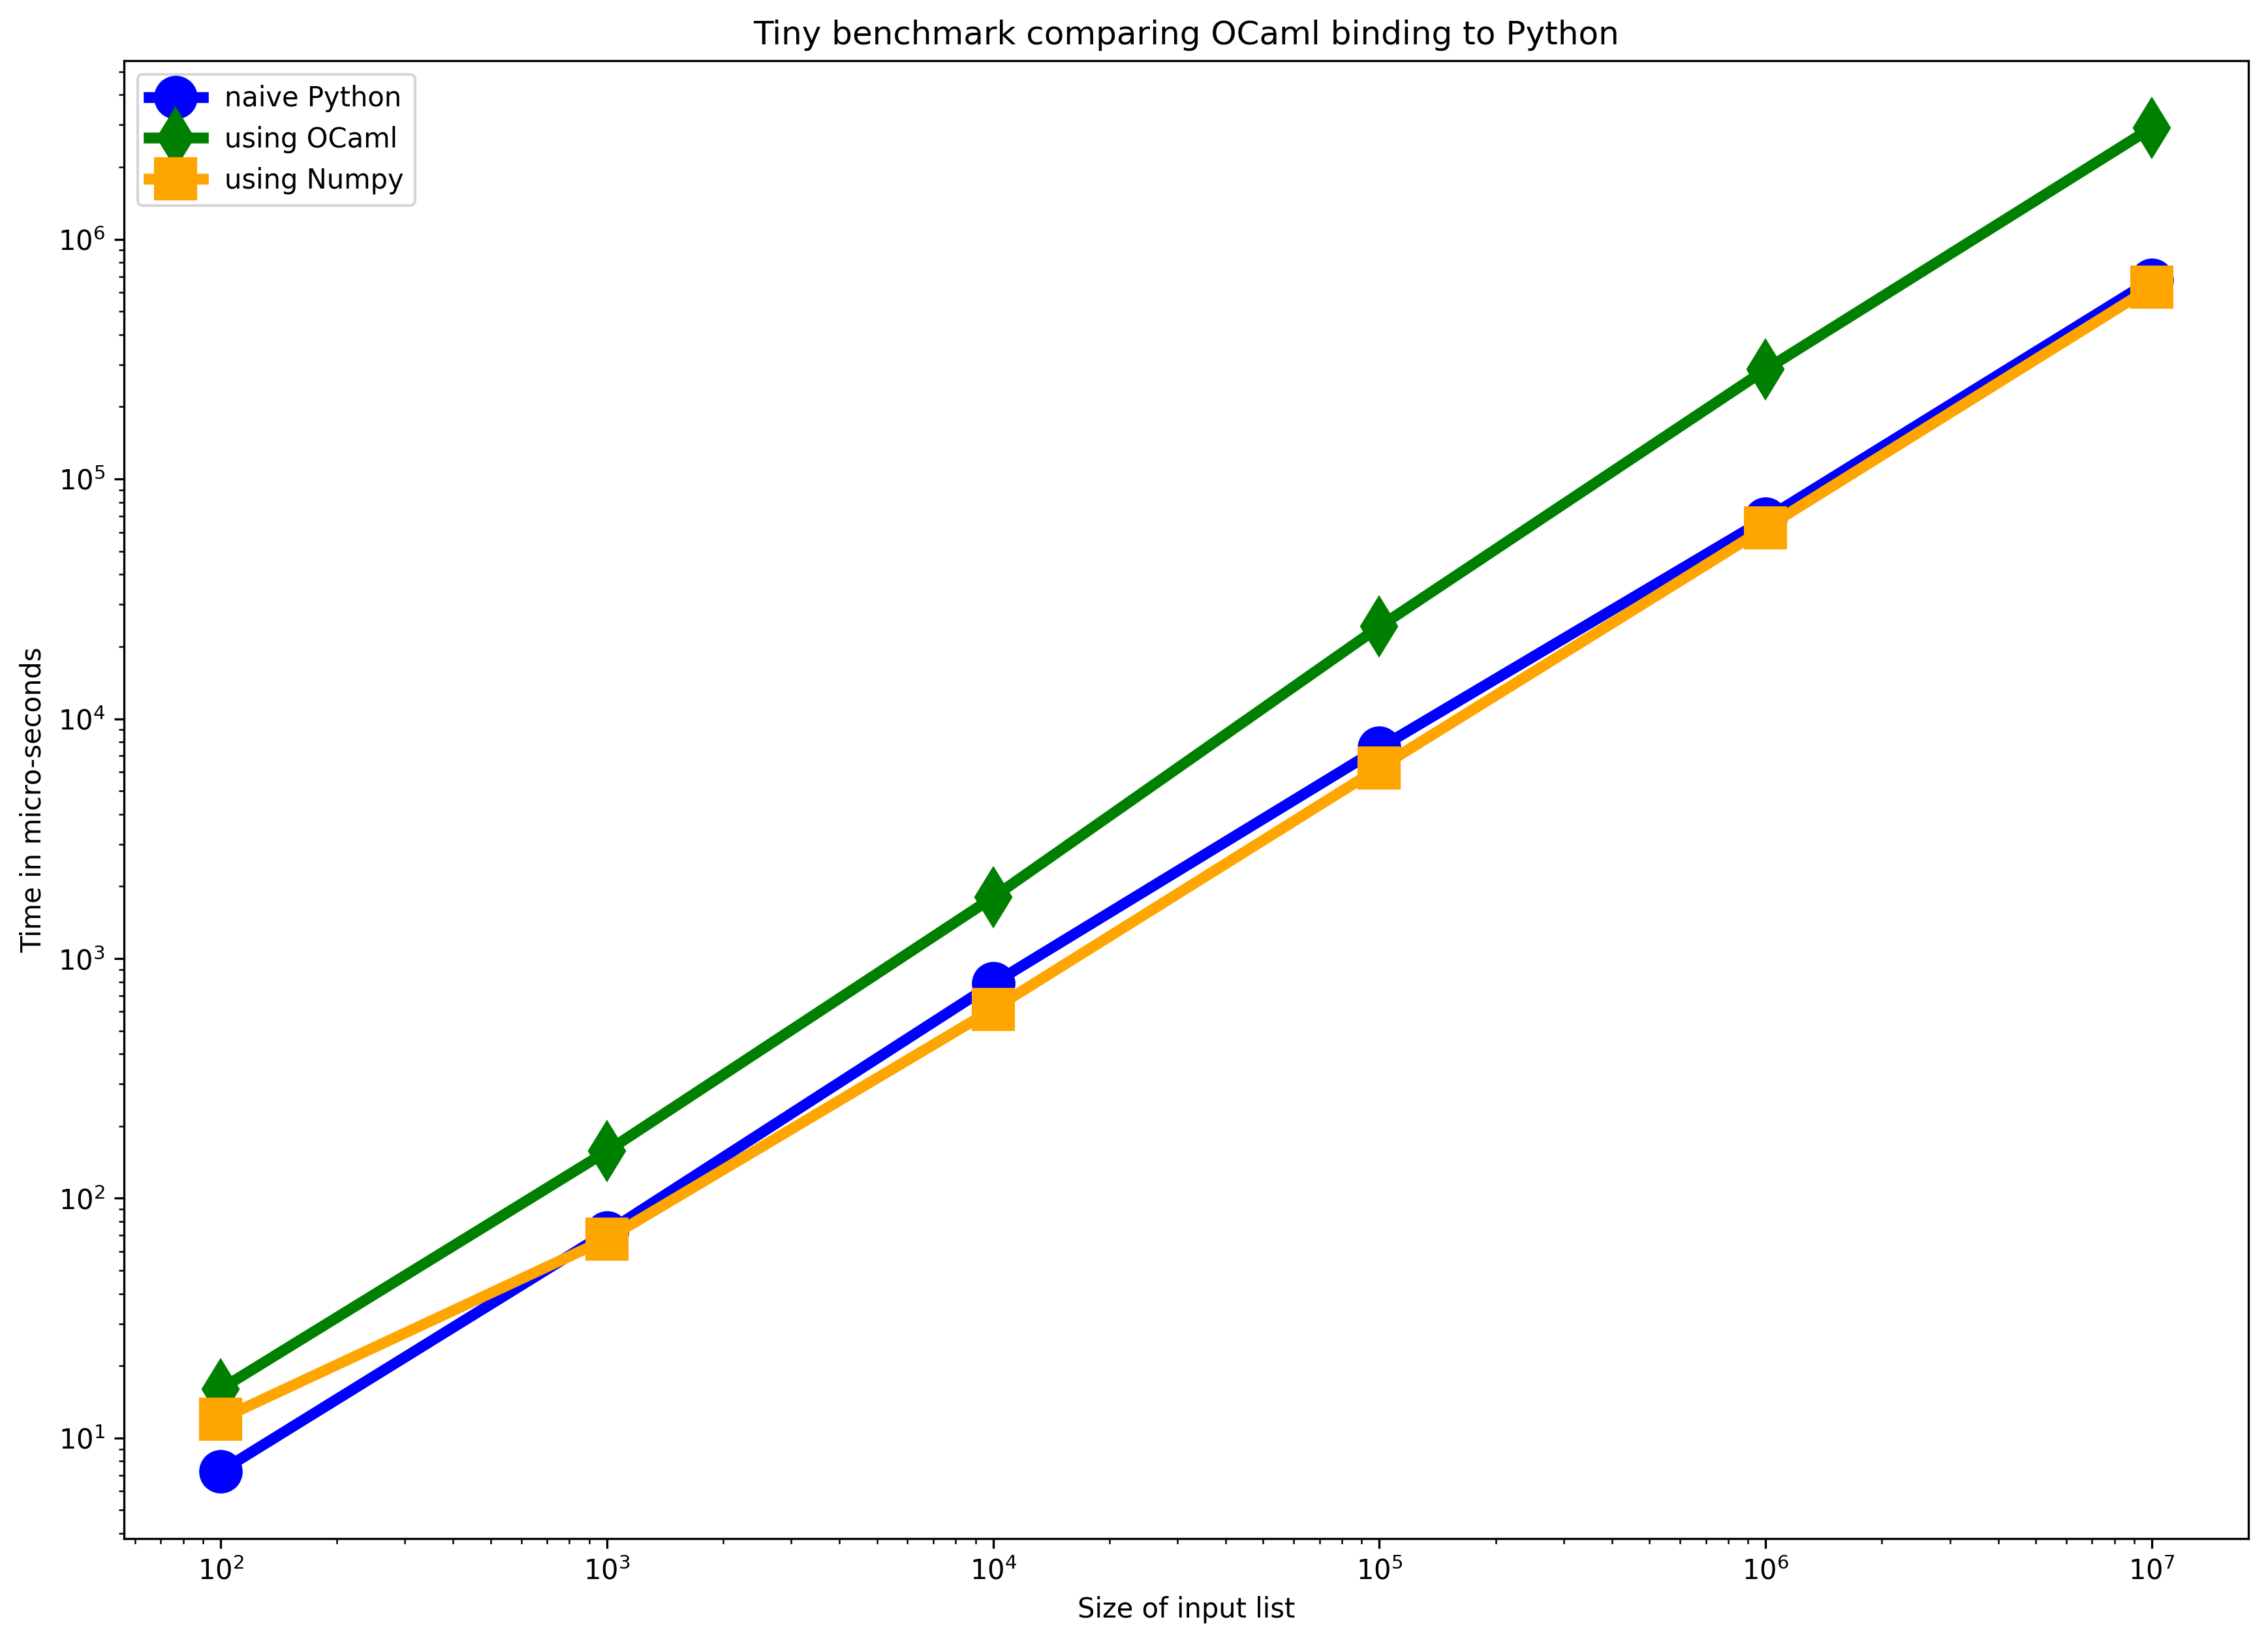

In [175]:
import matplotlib.pyplot as plt

µs = 1
ms = 1000*µs
s  = 1000*ms

X = sizes
# TODO: get this automatically?
    
Y_python = [ 7.27*µs, 72.1*µs, 786*µs, 7.55*ms, 68.2*ms, 677*ms ]
Y_ocaml  = [ 16*µs, 157*µs, 1.8*ms, 24.2*ms, 286*ms, 2.92*s ]
Y_numpy  = [ 12*µs, 67.7*µs, 615*µs, 6.25*ms, 62.6*ms, 632*ms ]

fig = plt.figure(figsize=(14, 10), dpi=300)

plt.loglog(X, Y_python, color="blue", marker="o", label="naive Python", lw=4, ms=15)
plt.loglog(X, Y_ocaml,  color="green", marker="d", label="using OCaml", lw=4, ms=15)
plt.loglog(X, Y_numpy,  color="orange", marker="s", label="using Numpy", lw=4, ms=15)

plt.ylabel("Time in micro-seconds")
plt.xlabel("Size of input list")
plt.legend()
plt.title("Tiny benchmark comparing OCaml binding to Python")
plt.show()

Just to check the experimental values of $\alpha$ and $\beta$ in my claim above, let's use [`numpy.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function:

In [133]:
np.polyfit(Y_python, Y_ocaml, deg=1)

array([    4.31769413, -3617.94315775])

So the OCaml bidding code runs about 4.5 times slower than the Python one!

It means that if you're doing a data analysis or some things in Python, and suddenly you think of an easy way to write an elegant and fast OCaml version, it's definitely viable to write it in OCaml, use `ocaml_function = %ocaml ...` and then use to solve your task!
The overhead for using OCaml interpreted functions should not be too large.

## Conclusion: demonstration of Pypi package OCaml for polyglot notebook

This (long) notebook dived in the details of [this Pypi `ocaml` package](https://pypi.org/project/ocaml/) allows to embed a real and complete OCaml runtime (with full standard library) in an IPython console or Jupyter notebook running IPython kernel (Python 3). OCaml functions and tiny programs can then be called directly from the IPython/Jupyter console, and results can be printed, or affected to Python variables! It even supports [Currying](https://en.wikipedia.org/wiki/Currying) multi-argument functions!

It's too bad that the package lack documentation, and is not open source, I would have liked to improve it a little bit!

See also: note, if you really want to use OCaml in a Jupyter notebook, the best solution is [OCaml-jupyter](https://github.com/akabe/ocaml-jupyter/) kernel!
(i opened [an issue](https://github.com/akabe/ocaml-jupyter/issues/167) there to present this to the developer, just for his curiosity)

That's it for today!
See [other notebooks](https://github.com/Naereen/notebooks/)